# SET 3

### Bahador Amjadi
### 2040470

In [11]:
library(ggplot2)
library(reshape2)  #for visualization

Warning message:
"package 'reshape2' was built under R version 3.6.3"

## Exercise 1

In [204]:
tring.func <- function(x, a , b ,c){
    if      (a<=x & x<c)   {output <- (2*(x-a))/((b-a)*(c-a))}
    else if (c<=x & x<=b)  {output <- ((2*(b-x))/((b-a)*(b-c)))}
    else                   {output <- (0)}
    return(output)}



func.plotter <- function(f, a, b, c){
    X    <- seq(a,b,0.01)
    df   <- data.frame(X=X)  
    F <- vector()
    for (x in X){F <- append(F, f(x, a, b, c))}
    df$F <- F   
    max.y <<- max(df$F)
    
    ggplot(data = df, aes(x =X , y = F)) +
    labs(title = "The Triangular Distribution",
    x = "X",
    y = "F") +
    geom_line(color='black', lwd=0.7)
    
    DF <<- data.frame(analytic=F)
    
}

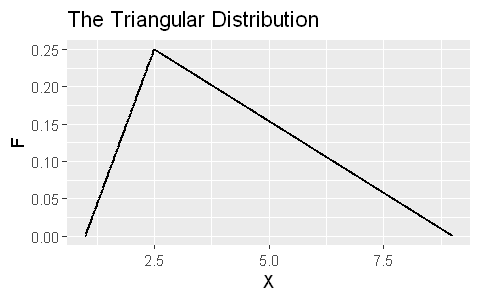

In [185]:
#part a

#options(repr.plot.width=4, repr.plot.height =2.5)  #changing size of plots

func.plotter(tring.func, 1, 9, 2.5)

In [187]:
#part b

#We try to use accept-reject method to generate random numbers from this distribution 

random.generator <- function(tring.func, a , b, c){
    
    N     <- 10000           #number of trying points
    
    x <- runif(N,a,b)
    y <- runif(N,0,max.y)
    accepted.x <- vector()
    accepted.y <- vector()
    
    for (i in seq(1,1000)) {if (y[i] < tring.func(x[i], a, b, c)){
        accepted.x <- append(accepted.x, x[i])
        accepted.y <- append(accepted.y, y[i])
    }}
    
    df <- data.frame(X = accepted.x , Y = accepted.y)
    return(df)
}

In [188]:
df <- random.generator(tring.func, 1, 9, 2.5)
#nuumbers generated via triang dist:
print(head(df[1]))

         X
1 7.429732
2 7.463793
3 2.020444
4 2.587719
5 4.444627
6 3.025682


In [212]:
X    <- seq(1,9,0.01)
F <- vector()
for (x in X){F <- append(F, tring.func(x, 1, 9, 2.5))}
DF <- data.frame(analytic = F)

In [47]:
DF$X <- random.generator(tring.func, 1, 9, 2.5)

ERROR: Error in random.generator(tring.func, 1, 9, 2.5): could not find function "random.generator"


Warning message in if (a <= x & x < c) {:
"the condition has length > 1 and only the first element will be used"Warning message:
"Removed 2 rows containing missing values (geom_bar)."

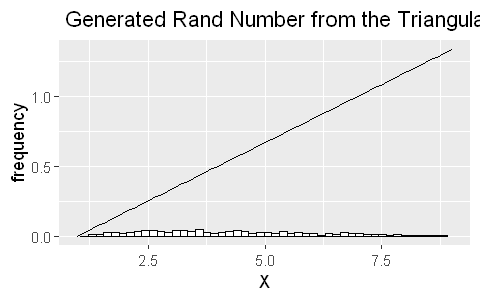

In [191]:
#part c

ggplot(df, aes(x=X)) +
    geom_histogram(aes(y=..count../sum(..count..)), color="black", fill="white", bins=50) +
    labs(title = " Generated Rand Number from the Triangular Distribution",
    x = "X",
    y = "frequency") 

Warning message in if (a <= x & x < c) {:
"the condition has length > 1 and only the first element will be used"

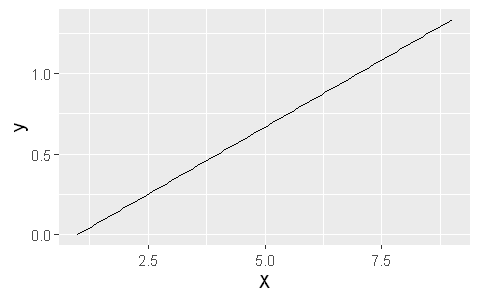

In [201]:
ggplot(df, aes(x=X))+ 
    stat_function(fun = tring.func, args = list(a =1, b=9, c=2.5)) + xlim(1,9)

## Exercise 2 - Markov’s inequality

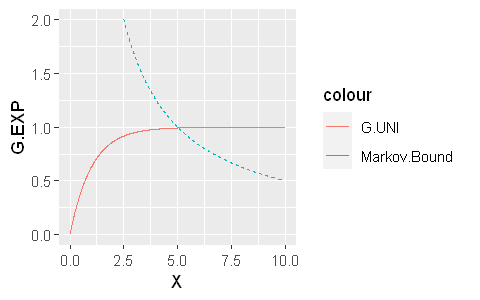

In [330]:
X    <- seq(0,10,0.01)
DF   <- data.frame(X=X, markov.bound = mean(X)/X)                       

Gexp    <- function(){
    Gexp.func <- function(x){return(1- dexp(x, rate = 1))}
    exp <- vector()
    for (x in X){exp <- append(exp, Gexp.func(x))}
    DF$G.EXP <<- exp} 
Gexp()


ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.EXP,        colour = "G.UNI")) + 
  geom_line(aes(y = markov.bound, colour = "Markov.Bound"), linetype = "dashed") + ylim(0,2)

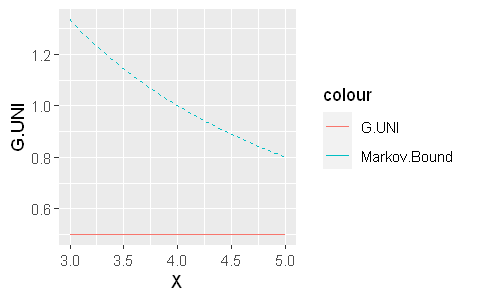

In [331]:
X    <- seq(3,5,0.01)
DF   <- data.frame(X=X, markov.bound = mean(X)/X)   
Guni    <- function(){
    Guni.func <- function(x){return(1- dunif(x, min= 3, max= 5))}
    uni <- vector()
    for (x in X){uni <- append(uni, Guni.func(x))}
    DF$G.UNI <<- uni}

Guni()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.UNI, colour = "G.UNI")) + 
  geom_line(aes(y = markov.bound, colour = "Markov.Bound"), linetype = "dashed")

Warning message:
"Removed 987 row(s) containing missing values (geom_path)."

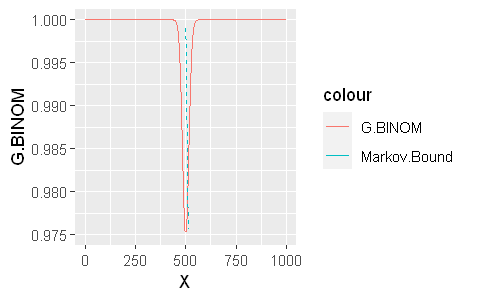

In [332]:
X    <- seq(1,1000,1)
DF   <- data.frame(X=X, markov.bound = mean(X)/X)   

Gbino    <- function(){
    Gbinom.func <- function(x){return(1- dbinom(x,size = 1000,  p = 1/2))}
    binom <- vector()
    for (x in X){binom <- append(binom, Gbinom.func(x))}
    DF$G.BINOM <<- binom}    
Gbino()
       
ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.BINOM     , colour = "G.BINOM")) + 
  geom_line(aes(y = markov.bound, colour = "Markov.Bound"), linetype = "dashed") + ylim(0.975,1)

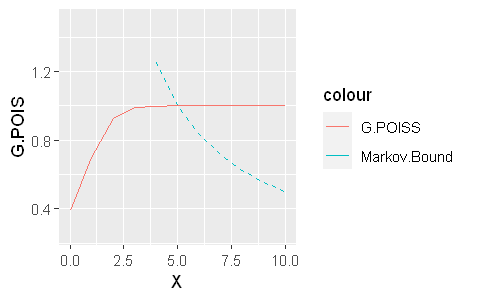

In [334]:
X    <- seq(0,10,1)
DF   <- data.frame(X=X, markov.bound = mean(X)/X)   

Gpoiss    <- function(){
    Gpois.func <- function(x){return(1- dpois(x, lambda = 1/2))}
    pois <- vector()
    for (x in X){pois <- append(pois, Gpois.func(x))}
    DF$G.POIS <<- pois}    
Gpoiss()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.POIS     , colour = "G.POISS")) + 
  geom_line(aes(y = markov.bound, colour = "Markov.Bound"), linetype = "dashed") + ylim(0.25,1.5)

## Exercise 3 - Chebyshev’s inequality

In [ ]:
a) a normal distribution, N(µ = 3, σ = 5)
a) an exponential distribution, Exp(λ = 1)
d) a Poisson, Pois(λ = 1/3), distribution function

In [ ]:
#poiss

X    <- seq(0,10,1)
DF   <- data.frame(X=X,  = mean(X)/X)   

Gpoiss    <- function(){
    Gpois.func <- function(x){return(1- dpois(x, lambda = 1/2))}
    pois <- vector()
    for (x in X){pois <- append(pois, Gpois.func(x))}
    DF$G.POIS <<- pois}    
Gpoiss()

ggplot(data = DF, aes(x = X)) +
  geom_line(aes(y = G.POIS     , colour = "G.POISS")) + 
  geom_line(aes(y = markov.bound, colour = "Markov.Bound"), linetype = "dashed") + ylim(0.25,1.5)

## Exercise 4 - Six Boxes Toy Model : Inference

In [40]:
df    <- data.frame(N=0, H0=1/6 , H1=1/6 , H2=1/6 , H3=1/6 , H4=1/6 , H5=1/6)
prob  <- rep(1/6, 6)
j     <- c(0,1,2,3,4,5)
state <- 0
N     <- 0  #counting the number of tries

while (state != 'exit'){
    color <- readline(prompt = "Ball Extraction 1 (white) or 0 (black) or exit:")

    if      (color == 1){prob <- (j/5 * prob)/sum(j/5 * prob)}
    else if (color == 0){prob <- ((5-j)/5) * prob / sum(((5-j)/5) *prob)}
    else    {break}
    
    N <- N+1
    df[nrow(df) + 1,1:7] <- c(N,prob)}

Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:0
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:0
Ball Extraction 1 (white) or 0 (black) or exit:0
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (white) or 0 (black) or exit:1
Ball Extraction 1 (w

In [42]:
head(df)

N,H0,H1,H2,H3,H4,H5
0,0.1666667,0.1666666667,0.166666667,0.16666667,0.1666667,0.1666667
1,0.0000000,0.0666666667,0.133333333,0.20000000,0.2666667,0.3333333
2,0.0000000,0.0181818182,0.072727273,0.16363636,0.2909091,0.4545455
3,0.0000000,0.0044444444,0.035555556,0.12000000,0.2844444,0.5555556
4,0.0000000,0.0010214505,0.016343207,0.08273749,0.2614913,0.6384065
5,0.0000000,0.0002259887,0.007231638,0.05491525,0.2314124,0.7062147


In [46]:
tail(df, n= 1) #printing the final set of values

,N,H0,H1,H2,H3,H4,H5
35,34,0,3.525847e-15,4.491999e-07,0.007561881,0.9924377,0


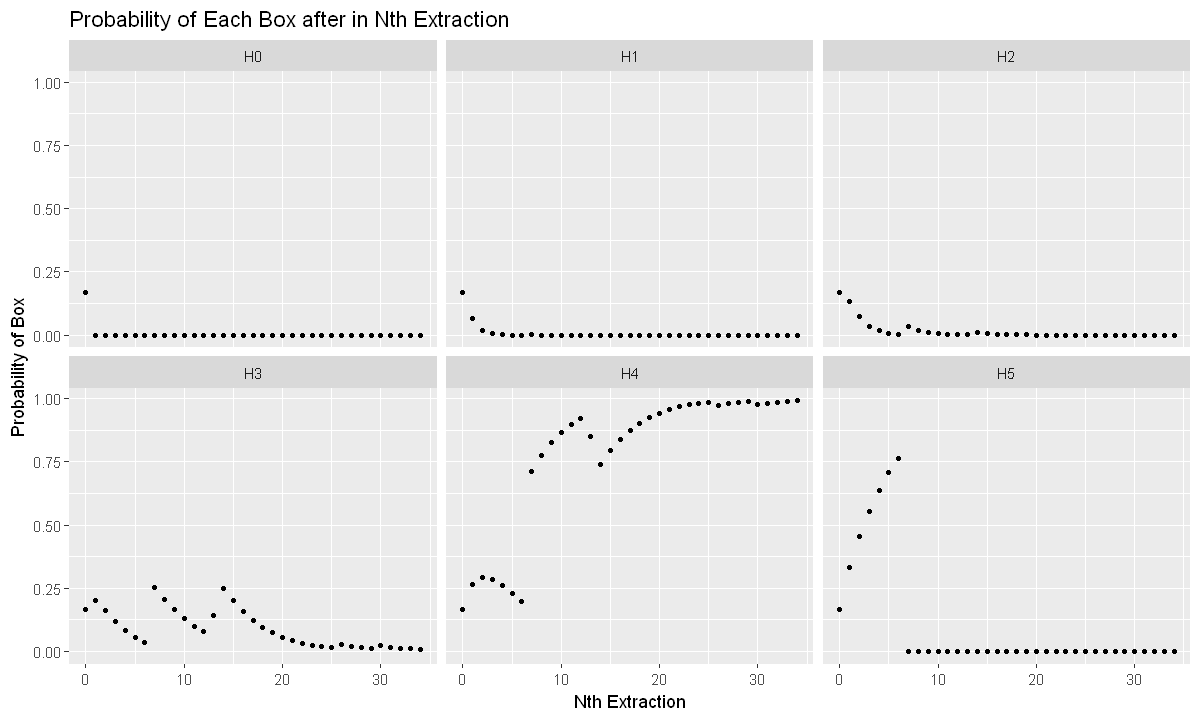

In [41]:
DF <- melt(df ,  id.vars = 'N', variable.name = 'series')  #reshaping the dataframe for plot purposes

options(repr.plot.width=10, repr.plot.height =6)  #changing size of plots
ggplot(data = DF, aes(x = N, y = value)) +
    geom_point(size=1) +
    facet_wrap(facets = vars(series))+
    labs(title = "Probability of Each Box after in Nth Extraction",
         x = "Nth Extraction",
         y = "Probability of Box")

## Exercise 5 - Six Boxes Toy Model : simulation

In [113]:
df    <- data.frame(N=0, H0=1/6 , H1=1/6 , H2=1/6 , H3=1/6 , H4=1/6 , H5=1/6)
prob  <- rep(1/6, 6)
j     <- c(0,1,2,3,4,5)
N     <- 0  #counting the number of tries

selected.box <- sample(j, 1)
box <- append(box, rep('white', selected.box))
box <- append(box, rep('black', 5-selected.box))

for (i in seq(1,20)){
    
    color <- sample(box, 1) #color of the extracted stone

    if      (color == 'white'){prob <- (j/5 * prob)/sum(j/5 * prob)}
    else if (color == 'black'){prob <- ((5-j)/5) * prob / sum(((5-j)/5) *prob)}
    
    N <- N+1
    df[nrow(df) + 1,1:7] <- c(N,prob)}

In [114]:
head(df)

N,H0,H1,H2,H3,H4,H5
0,0.1666667,0.1666667,0.1666667,0.1666667,0.16666667,0.1666667
1,0.3333333,0.2666667,0.2000000,0.1333333,0.06666667,0.0000000
2,0.3333333,0.2666667,0.2000000,0.1333333,0.06666667,0.0000000
3,0.0000000,0.2000000,0.3000000,0.3000000,0.20000000,0.0000000
4,0.0000000,0.0800000,0.2400000,0.3600000,0.32000000,0.0000000
5,0.0000000,0.1538462,0.3461538,0.3461538,0.15384615,0.0000000


In [115]:
tail(df, n= 1) #printing the final set of values

,N,H0,H1,H2,H3,H4,H5
21,20,0,0.001039488,0.2131276,0.7193057,0.06652726,0


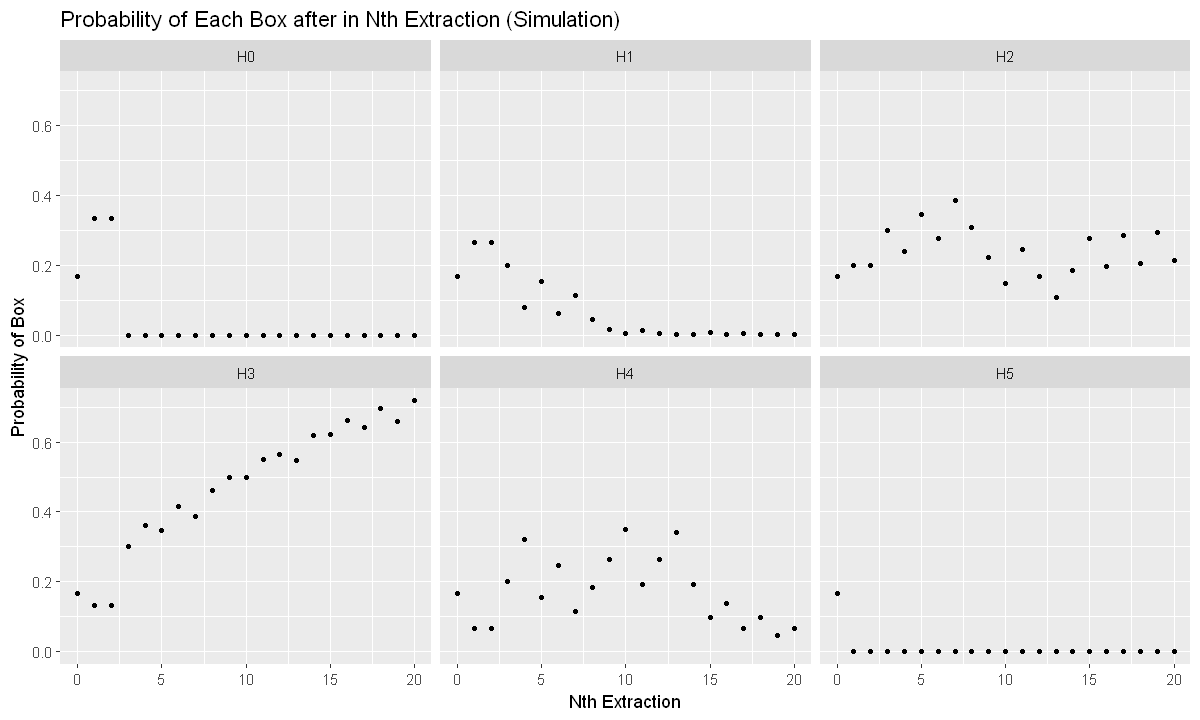

In [117]:
DF <- melt(df ,  id.vars = 'N', variable.name = 'series')  #reshaping the dataframe for plot purposes

options(repr.plot.width=10, repr.plot.height =6)  #changing size of plots
ggplot(data = DF, aes(x = N, y = value)) +
    geom_point(size=1) +
    facet_wrap(facets = vars(series))+
    labs(title = "Probability of Each Box after in Nth Extraction (Simulation)",
         x = "Nth Extraction",
         y = "Probability of Box")